<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sa
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df = df.rename({'R&D Spend':'rd_spend',	'Administration':'administration',	'Marketing Spend':'marketing_spend'},axis=1)

In [5]:
df

,rd_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rd_spend         50 non-null     float64
 1   administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isnull().sum()

rd_spend           0
administration     0
marketing_spend    0
State              0
Profit             0
dtype: int64

In [8]:
df[df.duplicated()]

,rd_spend,administration,marketing_spend,State,Profit


In [9]:
df.describe()

,rd_spend,administration,marketing_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


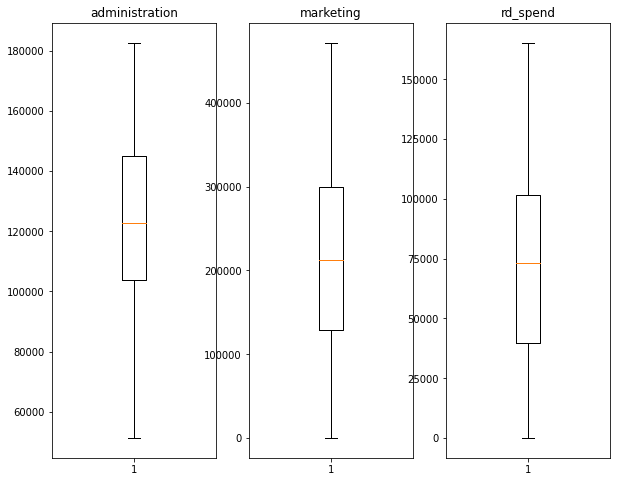

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(131)
plt.boxplot(df['administration'])
plt.title('administration')
plt.subplot(132)
plt.boxplot(df['marketing_spend'])
plt.title('marketing')
plt.subplot(133)
plt.boxplot(df['rd_spend'])
plt.title('rd_spend')
plt.show()


No outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

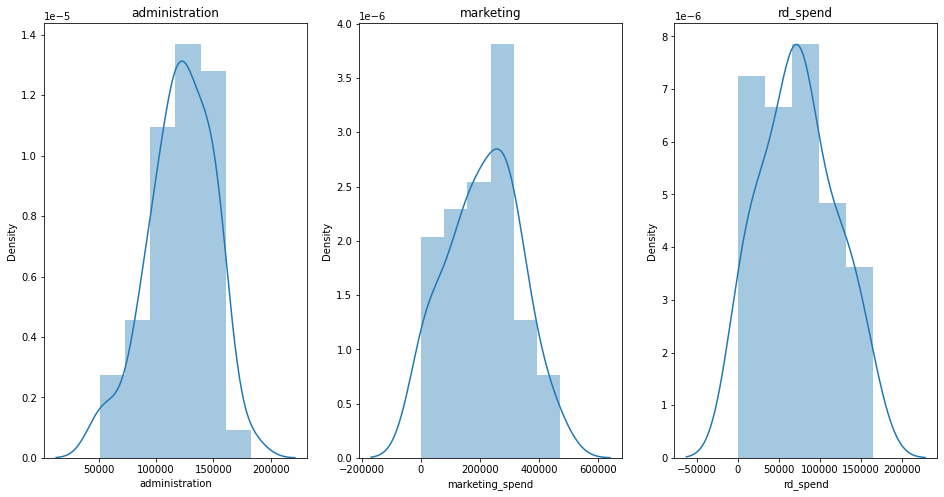

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(131)
sns.distplot(df['administration'])
plt.title('administration')
plt.subplot(132)
sns.distplot(df['marketing_spend'])
plt.title('marketing')
plt.subplot(133)
sns.distplot(df['rd_spend'])
plt.title('rd_spend')
plt.show()


Text(0.5, 1.0, 'marketing')

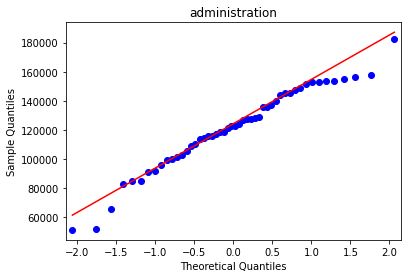

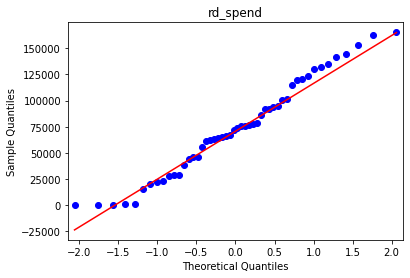

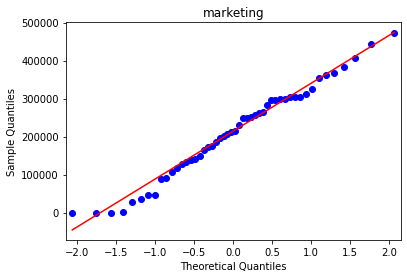

In [12]:
sa.qqplot(df['administration'], line='q')
plt.title('administration')
sa.qqplot(df['rd_spend'], line='q')
plt.title('rd_spend')
sa.qqplot(df['marketing_spend'], line='q')
plt.title('marketing')

Checked for normality.


Check for multicollinearity

In [13]:
df.corr()

,rd_spend,administration,marketing_spend,Profit
rd_spend,1.000000,0.241955,0.724248,0.972900
administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
vif_adm = smf.ols('administration~rd_spend+marketing_spend',data=df).fit().rsquared

In [15]:
vif_rd = smf.ols('rd_spend~administration+marketing_spend',data=df).fit().rsquared
vif_mar = smf.ols('marketing_spend~rd_spend+administration',data=df).fit().rsquared

In [16]:
vif_adm = 1/(1-(vif_adm**2))

In [17]:
vif_rd = 1/(1-(vif_rd**2))

In [18]:
vif_mar = 1/(1-(vif_mar**2))

In [19]:
vif_df = {'model':['admin','rd','marketing'], 'vif': [vif_adm,vif_rd,vif_mar]}

In [20]:
pd.DataFrame(vif_df)

,model,vif
0,admin,1.022706
1,rd,1.547939
2,marketing,1.481813


as vif of all the variables are less than 20 we can consider all the independent variables for building the model.

In [21]:
model = smf.ols('Profit~marketing_spend+rd_spend+administration',data=df).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        15:59:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
rd_spend            0.8057      0.045     17.846      0.000       0.715       0.897
administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model.params

Intercept          50122.192990
marketing_spend        0.027228
rd_spend               0.805715
administration        -0.026816
dtype: float64

In [24]:
model.pvalues

Intercept          1.057379e-09
marketing_spend    1.047168e-01
rd_spend           2.634968e-22
administration     6.017551e-01
dtype: float64

check for pvalues of marketing and administration by building separate models.

In [25]:
admin_model = smf.ols('Profit~administration',data=df).fit()

In [26]:
admin_model.pvalues

Intercept         0.003824
administration    0.162217
dtype: float64

p-value is insignificant

In [27]:
mar_model = smf.ols('Profit~marketing_spend',data=df).fit()

In [28]:
mar_model.pvalues

Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64

p-value is significant

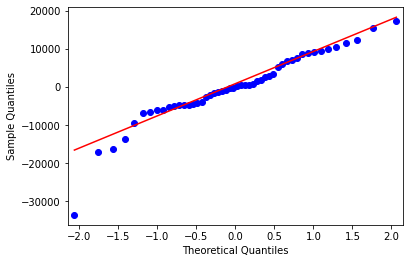

In [29]:
sa.qqplot(model.resid,line='q');

In [30]:
list(np.where(model.resid<-30000))

[array([49])]

In [31]:
def get_standardized_values(vals):
  return ((vals-vals.mean())/vals.std())

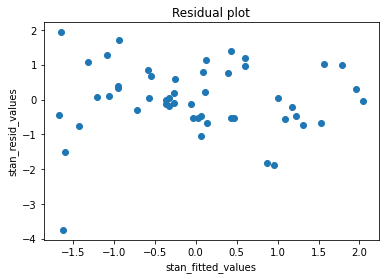

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('stan_fitted_values')
plt.ylabel('stan_resid_values')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(df['Profit'],model.fittedvalues))

In [34]:
rmse

8855.344489015139

In [35]:
model_rmse = rmse

In [36]:
model_r2 = model.rsquared

In [37]:
print(model_rmse, model_r2)

8855.344489015139 0.9507459940683246


In [38]:
df3 = df.drop(labels =[47,48,49])

In [39]:
df3

,rd_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
df3.drop(labels=[19],inplace=True)

In [41]:
model1 = smf.ols('np.log(Profit)~np.log(marketing_spend)+np.log(rd_spend)+np.log(administration)',data=df3).fit()

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     39.36
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.85e-12
Time:                        16:00:38   Log-Likelihood:                 19.072
No. Observations:                  46   AIC:                            -30.14
Df Residuals:                      42   BIC:                            -22.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.8451      1.316      5.959      0.000       5.188      10.502
np.log(marketing_spend)     0.0195      0.037      0.525      0.602      -0.055       0.094
np.log(rd_spend)            0.2473      0.033      7.439      0.000       0.180       0.314
np.log(administration)      0.0709      0.107      0.660      0.513      -0.146       0.288
==============================================================================
Omnibus:                       11.370   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.255
Skew:                           1.028   Prob(JB):                      0.00360
Kurtosis:                       4.283   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model1.rsquared

0.7376373888816568

In [44]:
model2 = smf.ols('np.sqrt(Profit)~np.sqrt(marketing_spend)+np.sqrt(rd_spend)+np.sqrt(administration)',data=df3).fit()

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.68e-23
Time:                        16:00:40   Log-Likelihood:                -187.76
No. Observations:                  46   AIC:                             383.5
Df Residuals:                      42   BIC:                             390.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  192.1026     22.554      8.517      0.000     146.587     237.618
np.sqrt(marketing_spend)     0.0316      0.023      1.364      0.180      -0.015       0.078
np.sqrt(rd_spend)            0.5344      0.036     14.969      0.000       0.462       0.606
np.sqrt(administration)     -0.0295      0.061     -0.488      0.628      -0.152       0.093
==============================================================================
Omnibus:                       18.673   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.108
Skew:                           1.307   Prob(JB):                     2.14e-06
Kurtosis:                       5.605   Cond. No.                     6.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model3 = smf.ols('np.cbrt(Profit)~np.cbrt(marketing_spend)+np.cbrt(rd_spend)+np.cbrt(administration)',data=df3).fit()

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Profit)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     107.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           9.02e-20
Time:                        16:00:40   Log-Likelihood:                -89.329
No. Observations:                  46   AIC:                             186.7
Df Residuals:                      42   BIC:                             194.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   28.7315      3.850      7.462      0.000      20.961      36.502
np.cbrt(marketing_spend)     0.0339      0.028      1.201      0.236      -0.023       0.091
np.cbrt(rd_spend)            0.4388      0.036     12.063      0.000       0.365       0.512
np.cbrt(administration)     -0.0030      0.073     -0.040      0.968      -0.151       0.145
==============================================================================
Omnibus:                       24.484   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.600
Skew:                           1.559   Prob(JB):                     3.41e-10
Kurtosis:                       6.608   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
y_pred = model.fittedvalues
y_pred1 = np.exp(model1.fittedvalues)
y_pred2 = np.square(model2.fittedvalues)
y_pred3 = pow(model3.fittedvalues,3)

In [49]:
rmse = np.sqrt(mean_squared_error(df['Profit'],y_pred))
rmse2 = np.sqrt(mean_squared_error(df3['Profit'],y_pred2))
rmse3 = np.sqrt(mean_squared_error(df3['Profit'],y_pred3))
rmse1 = np.sqrt(mean_squared_error(df3['Profit'],y_pred1))



In [50]:
dataframe = {'model_name':['regular_model', 'log_tran_model', 'sqrt_tran_model','cbrt_tran_model'], 'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared],'RMSE':[rmse,rmse1,rmse2,rmse3]}

In [51]:
Tabulated_values = pd.DataFrame(dataframe)

In [52]:
Tabulated_values

,model_name,Rsquared,RMSE
0,regular_model,0.950746,8855.344489
1,log_tran_model,0.737637,18400.464771
2,sqrt_tran_model,0.923797,9354.257952
3,cbrt_tran_model,0.885196,11396.855059


By comparing the R2 and RMSE values regular model is the best model.

Residual analysis

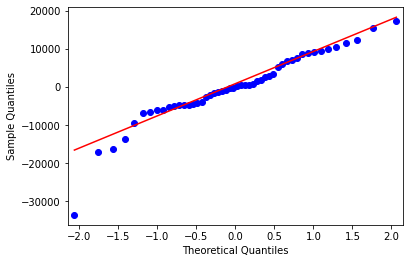

In [53]:
sa.qqplot(model.resid,line='q');

In [54]:
list(np.where(model.resid<-30000))

[array([49])]

In [55]:
def get_standardized_values(vals):
  return ((vals-vals.mean())/vals.std())

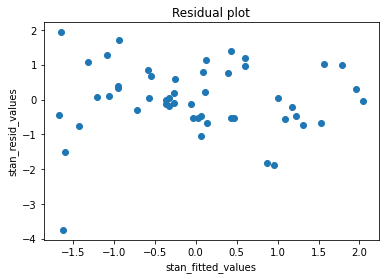

In [56]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('stan_fitted_values')
plt.ylabel('stan_resid_values')
plt.show()

In [57]:
from statsmodels.graphics.regressionplots import influence_plot

Let us check for residuals vs exogenous variables.

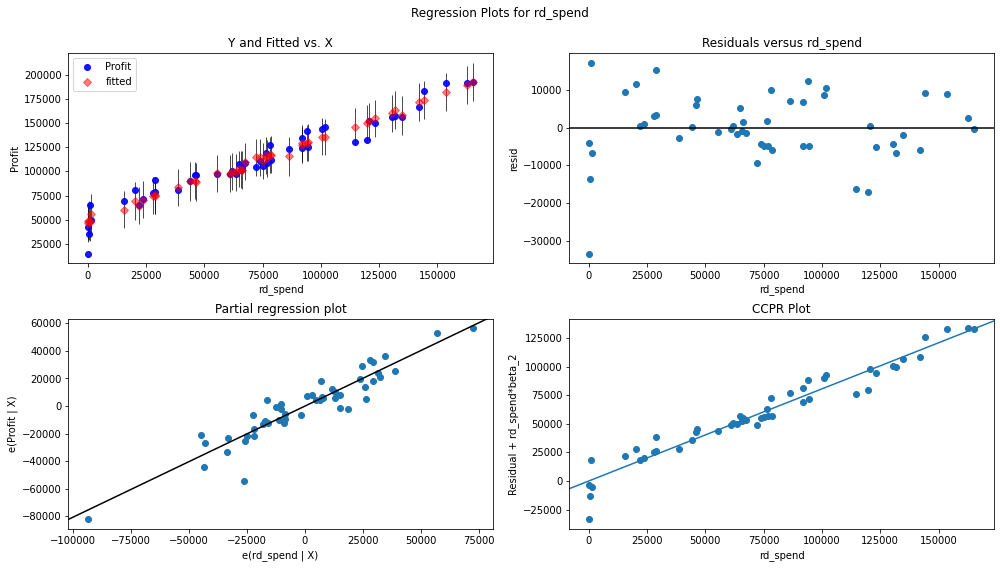

In [58]:
sa.graphics.plot_regress_exog(model,'rd_spend', plt.figure(figsize=(14,8)));

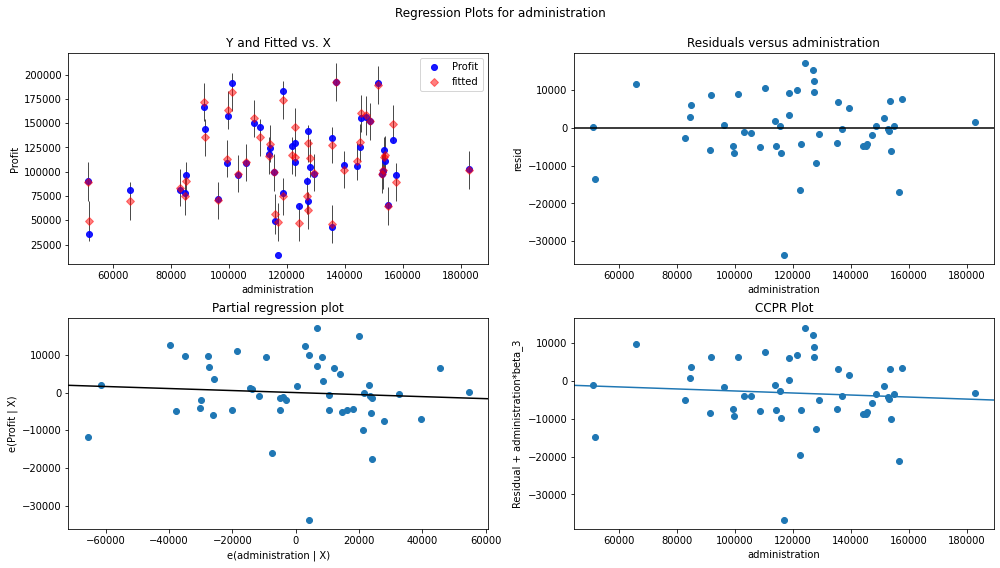

In [59]:
sa.graphics.plot_regress_exog(model,'administration', plt.figure(figsize=(14,8)));

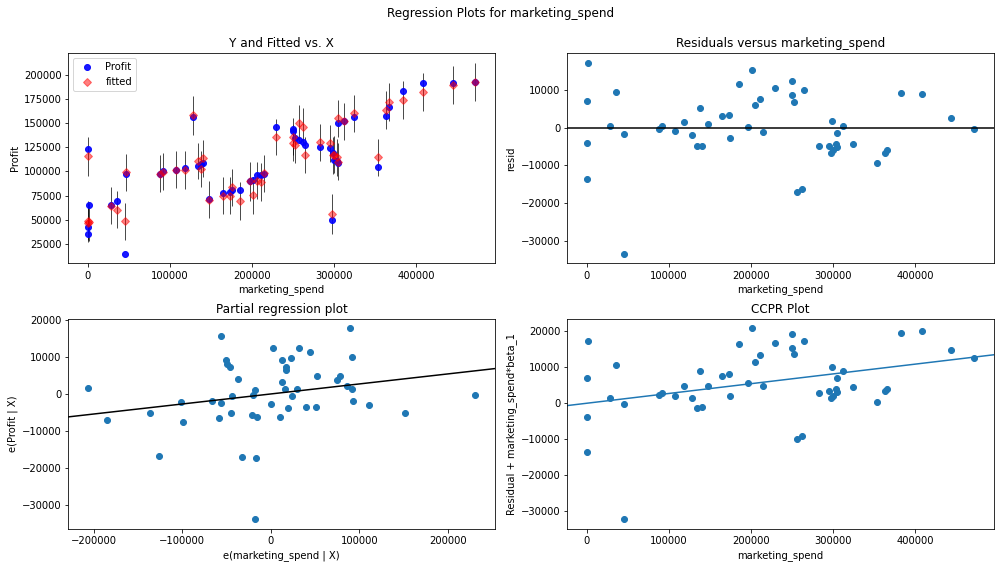

In [60]:
sa.graphics.plot_regress_exog(model,'marketing_spend', plt.figure(figsize=(14,8)));

In [ ]:
(c,_) = model.get_influence().cooks_distance

In [ ]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


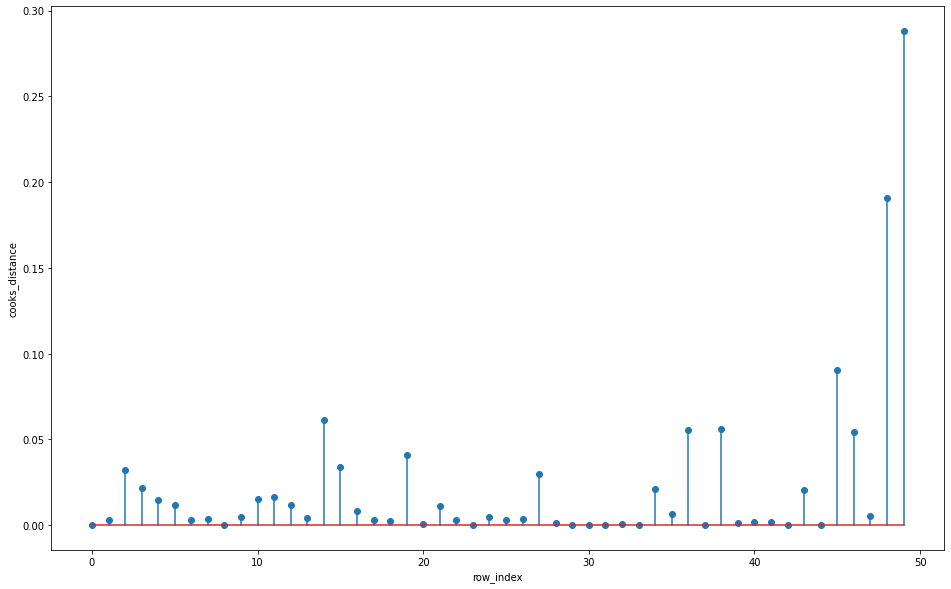

In [ ]:
plt.figure(figsize=(16,10))
plt.stem(np.arange(len(df)), np.round(c,5))
plt.xlabel('row_index')
plt.ylabel('cooks_distance')
plt.show()


In [ ]:
np.argmax(c), np.max(c)

(49, 0.2880822927543274)

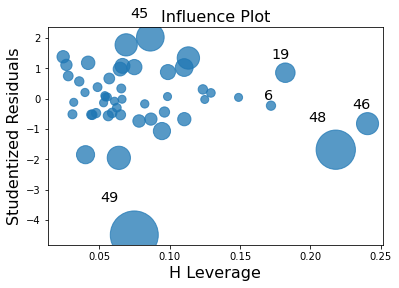

In [ ]:
influence_plot(model);

In [ ]:
df.shape

(50, 5)

In [ ]:
k = df.shape[1]
n =  df.shape[0]

In [ ]:
leverage_cutoff = (3*(k+1))/n

In [ ]:
leverage_cutoff

0.36

from influence plot we can see that 49th data set are having maximum negative influence on the regression model.

In [ ]:
df_new = df.drop(labels=[49],axis=0).reset_index(drop=True)

In [ ]:
df_new

,rd_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
while np.max(c)>0.5:
  model_new = smf.ols("Profit~rd_spend+marketing_spend+administration", data=df_new).fit()
  (c,_)= model_new.get_influence().cooks_distance
  c
  np.argmax(c), np.max(c)
  df_new = df_new.drop(labels=[np.argmax(c)],axis=0).reset_index(drop=True)
  df_new
else:
  final_model = smf.ols("Profit~rd_spend+marketing_spend+administration", data=df_new).fit()
  final_model.rsquared, final_model.aic
  print('The accuracy is improved to', final_model.rsquared)


The accuracy is improved to 0.9613162435129847


In [ ]:
new_dataset = {'rd_spend':[200000],'marketing_spend':[280000],'administration':[12000]}
new_dataset =pd.DataFrame(new_dataset)

In [ ]:
new_dataset

,rd_spend,marketing_spend,administration
0,200000,280000,12000


In [ ]:
final_model.predict(new_dataset)

0    215781.811974
dtype: float64

In [ ]:
y_pred_final = final_model.predict(df_new)

In [ ]:
y_pred_final

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
Tabulated_values

,model_name,Rsquared,RMSE
0,regular_model,0.950746,8855.344489
1,log_tran_model,0.737637,18400.464771
2,sqrt_tran_model,0.923797,9354.257952
3,cbrt_tran_model,0.885196,11396.855059


In [ ]:
rmse_final = np.sqrt(mean_squared_error(df_new['Profit'],y_pred_final))

In [ ]:
r_sq = {'model_name': 'final_model', 'Rsquared':final_model.rsquared,'RMSE':rmse_final}

In [ ]:
Tabulated_values.append(r_sq, ignore_index=True)

,model_name,Rsquared,RMSE
0,regular_model,0.950746,8855.344489
1,log_tran_model,0.737637,18400.464771
2,sqrt_tran_model,0.923797,9354.257952
3,cbrt_tran_model,0.885196,11396.855059
4,final_model,0.961316,7430.589094


Toyota corrolla price analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sa
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/ToyotaCorolla.csv', encoding='latin1')

In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


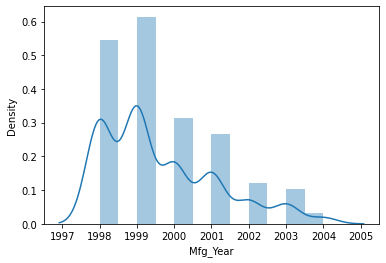

In [8]:
sns.distplot(df['Mfg_Year'])

In [9]:
toyo2 = df.iloc[:,[2,3,5,6,8,17,25,26]]

In [10]:
toyo2

,Price,Age_08_04,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
0,13500,23,2002,46986,90,1165,0,1
1,13750,23,2002,72937,90,1165,0,1
2,13950,24,2002,41711,90,1165,0,1
3,14950,26,2002,48000,90,1165,0,1
4,13750,30,2002,38500,90,1170,0,1
...,...,...,...,...,...,...,...,...
1431,7500,69,1998,20544,86,1025,0,0
1432,10845,72,1998,19000,86,1015,0,0
1433,8500,71,1998,17016,86,1015,0,0
1434,7250,70,1998,16916,86,1015,0,0


In [11]:
toyo2 = toyo2.rename({'Age_08_04':'age'},axis=1)

In [13]:
toyo2[toyo2.duplicated()]

,Price,age,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
113,24950,8,2004,13253,116,1320,1,0


In [14]:
toyo2 = toyo2.drop_duplicates().reset_index(drop=True)

In [15]:
toyo2

,Price,age,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
0,13500,23,2002,46986,90,1165,0,1
1,13750,23,2002,72937,90,1165,0,1
2,13950,24,2002,41711,90,1165,0,1
3,14950,26,2002,48000,90,1165,0,1
4,13750,30,2002,38500,90,1170,0,1
...,...,...,...,...,...,...,...,...
1430,7500,69,1998,20544,86,1025,0,0
1431,10845,72,1998,19000,86,1015,0,0
1432,8500,71,1998,17016,86,1015,0,0
1433,7250,70,1998,16916,86,1015,0,0


In [16]:
toyo2.describe()

,Price,age,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
count,1435.000000,1435.000000,1435.00000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,1999.62230,68571.782578,101.491986,1072.287108,0.055749,0.294774
std,3608.732978,18.563312,1.53692,37491.094553,14.981408,52.251882,0.229517,0.456100
min,4350.000000,1.000000,1998.00000,1.000000,69.000000,1000.000000,0.000000,0.000000
25%,8450.000000,44.000000,1998.00000,43000.000000,90.000000,1040.000000,0.000000,0.000000
50%,9900.000000,61.000000,1999.00000,63451.000000,110.000000,1070.000000,0.000000,0.000000
75%,11950.000000,70.000000,2001.00000,87041.500000,110.000000,1085.000000,0.000000,1.000000
max,32500.000000,80.000000,2004.00000,243000.000000,192.000000,1615.000000,1.000000,1.000000


In [17]:
data = toyo2

In [18]:
data.corr()

,Price,age,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
Price,1.000000,-0.876273,0.884627,-0.569420,0.314134,0.575869,0.583614,0.606404
age,-0.876273,1.000000,-0.983601,0.504575,-0.155293,-0.466484,-0.422352,-0.722390
Mfg_Year,0.884627,-0.983601,1.000000,-0.503855,0.163294,0.469108,0.433369,0.723989
KM,-0.569420,0.504575,-0.503855,1.000000,-0.332904,-0.023969,-0.255707,-0.354847
HP,0.314134,-0.155293,0.163294,-0.332904,1.000000,0.087143,0.243702,0.130212
Weight,0.575869,-0.466484,0.469108,-0.023969,0.087143,1.000000,0.422796,0.278639
Automatic_airco,0.583614,-0.422352,0.433369,-0.255707,0.243702,0.422796,1.000000,0.275910
Boardcomputer,0.606404,-0.722390,0.723989,-0.354847,0.130212,0.278639,0.275910,1.000000


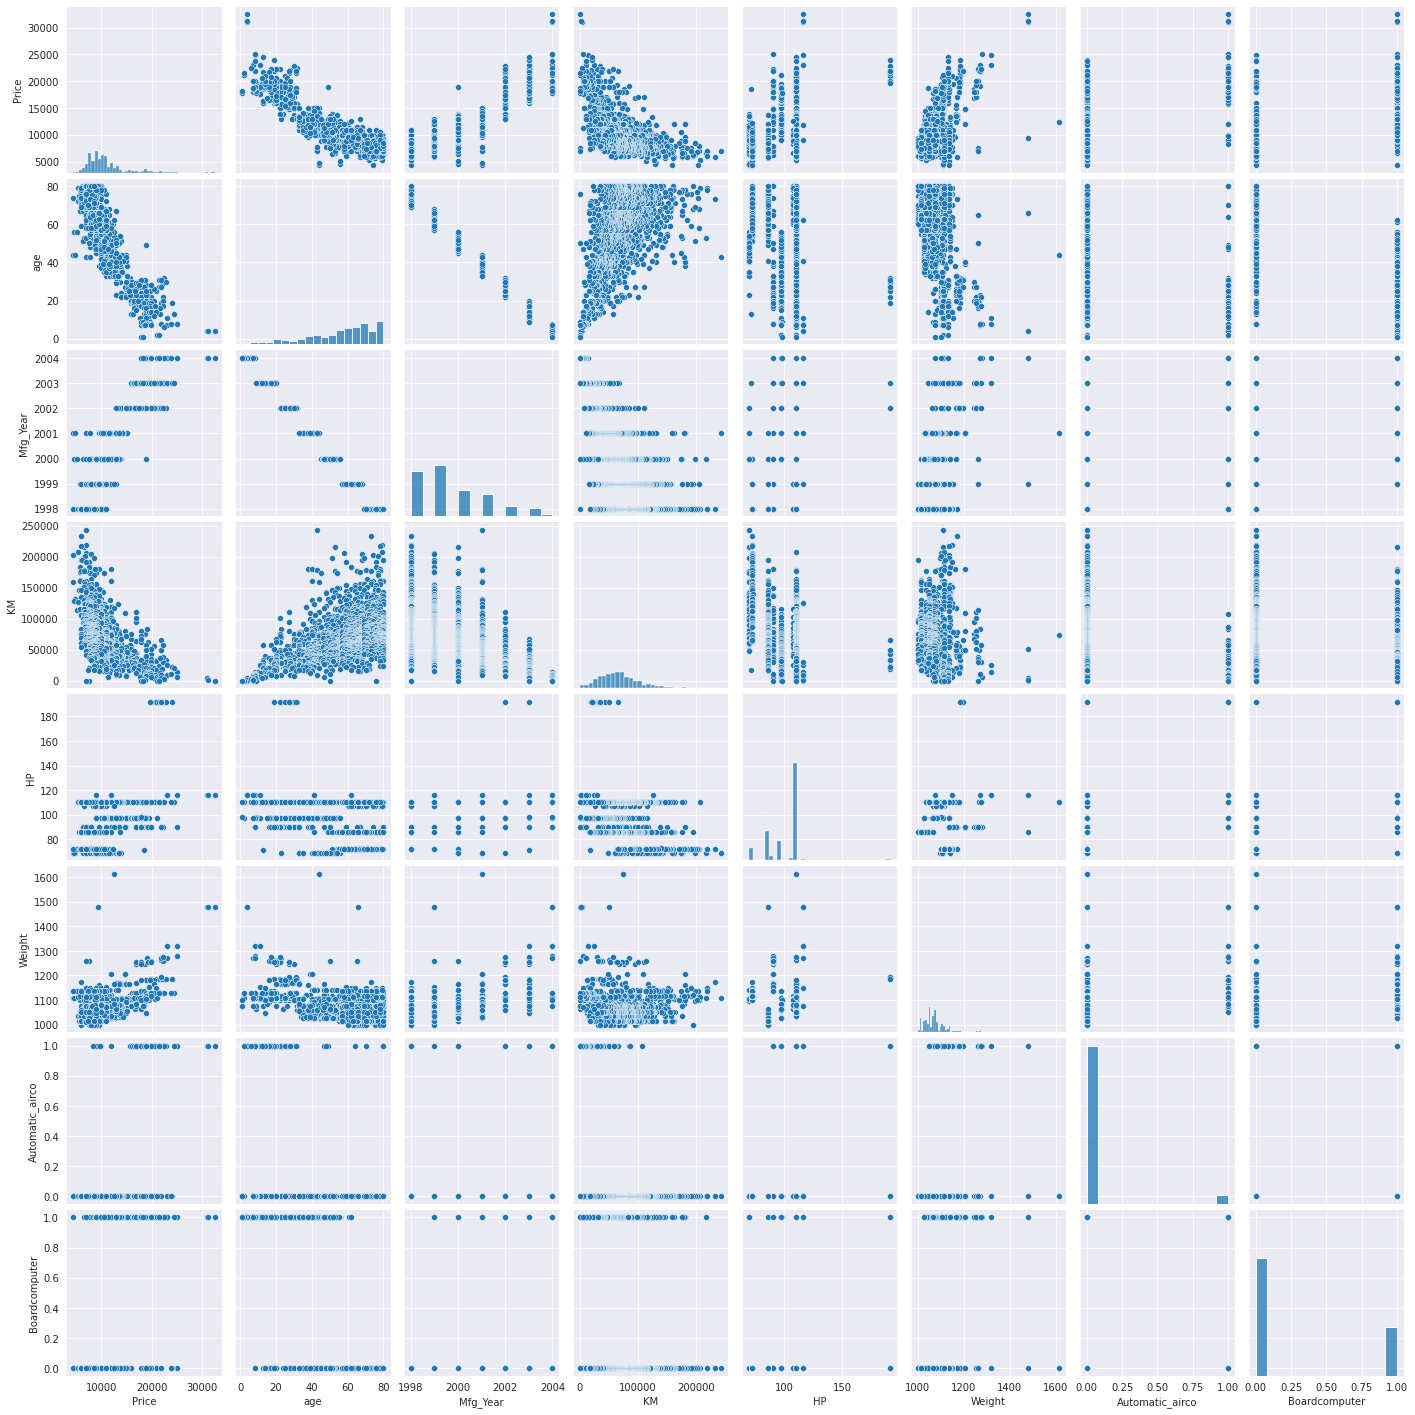

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(data=data)

In [20]:
model_ols = smf.ols('Price~age+KM+Weight+Automatic_airco+Boardcomputer',data=data).fit()

In [22]:
model_ols.params

Intercept          2333.675690
age                -115.205828
KM                   -0.021344
Weight               15.076066
Automatic_airco    2954.834646
Boardcomputer      -103.329009
dtype: float64

In [24]:
model_ols.tvalues, model_ols.pvalues

(Intercept           2.490930
 age               -35.134557
 KM                -19.297258
 Weight             18.634962
 Automatic_airco    17.158560
 Boardcomputer      -0.952603
 dtype: float64, Intercept           1.285369e-02
 age                1.918174e-195
 KM                  6.386955e-74
 Weight              1.497357e-69
 Automatic_airco     3.770099e-60
 Boardcomputer       3.409526e-01
 dtype: float64)

In [25]:
model_ols.rsquared

0.8730279259553044

In [26]:
model_ols.rsquared_adj

0.8725836569768415

In [28]:
mode_bod = smf.ols('Price~Boardcomputer',data=data).fit()

In [29]:
mode_bod.tvalues, mode_bod.pvalues

(Intercept        103.138916
 Boardcomputer     28.869061
 dtype: float64, Intercept         0.000000e+00
 Boardcomputer    7.746291e-145
 dtype: float64)

In [30]:
age = smf.ols('age~KM+Weight+Boardcomputer+Automatic_airco', data=data).fit().rsquared
vif_age = 1/(1-age)

In [31]:
vif_age

3.2018824850640017

In [33]:
KM = smf.ols('KM~age+Weight+Boardcomputer+Automatic_airco', data=data).fit().rsquared
vif_KM = 1/(1-KM)
Weight = smf.ols('Weight~KM+age+Boardcomputer+Automatic_airco', data=data).fit().rsquared
vif_wei = 1/(1-Weight)
ac = smf.ols('Automatic_airco~KM+Weight+Boardcomputer+age', data=data).fit().rsquared
vif_ac = 1/(1-ac)
comp = smf.ols('Boardcomputer~KM+Weight+age+Automatic_airco', data=data).fit().rsquared
vif_comp = 1/(1-comp)

In [37]:
print('VIF_comp:',vif_comp ,'\n', vif_ac,'\n',vif_wei,'\n',vif_age,'\n',vif_KM)

VIF_comp: 2.1152194707513154 
 1.3500424314922186 
 1.544320574497752 
 3.2018824850640017 
 1.4860985529534427


consider all the variables for regression.

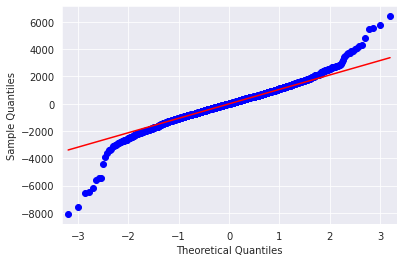

In [39]:
sa.qqplot(model_ols.resid, line='q');

In [40]:
list(np.where(model_ols.resid>6000))

[array([140])]

In [45]:
outl = list(np.where(model_ols.resid<-6000))

In [46]:
outl

[array([190, 191, 220, 600, 959])]

In [47]:
def stan_vals(vals):
  return ((vals-vals.mean())/vals.std())

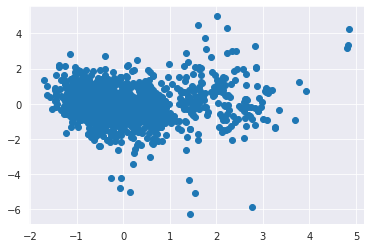

In [49]:
plt.scatter(stan_vals(model_ols.fittedvalues), stan_vals(model_ols.resid))

In [50]:
%matplotlib inline

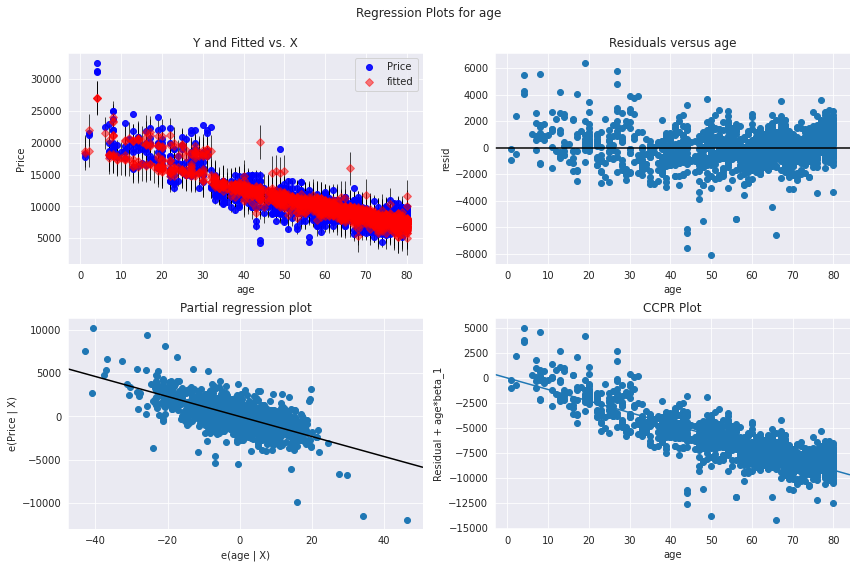

In [52]:
fig = plt.figure(figsize=(12,8))
sa.graphics.plot_regress_exog(model_ols,'age',fig=fig);


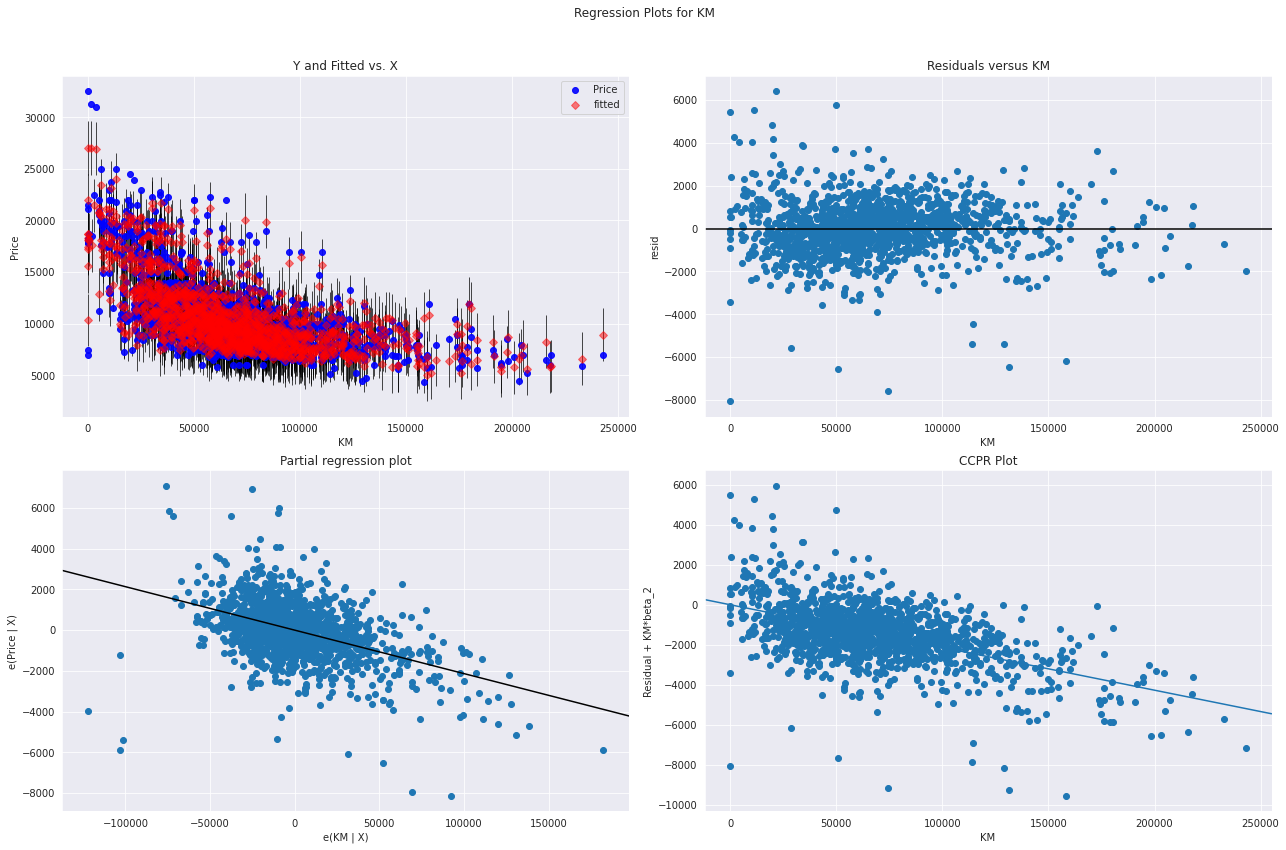

In [54]:
fig = plt.figure(figsize=(18,12))
sa.graphics.plot_regress_exog(model_ols,'KM',fig=fig);

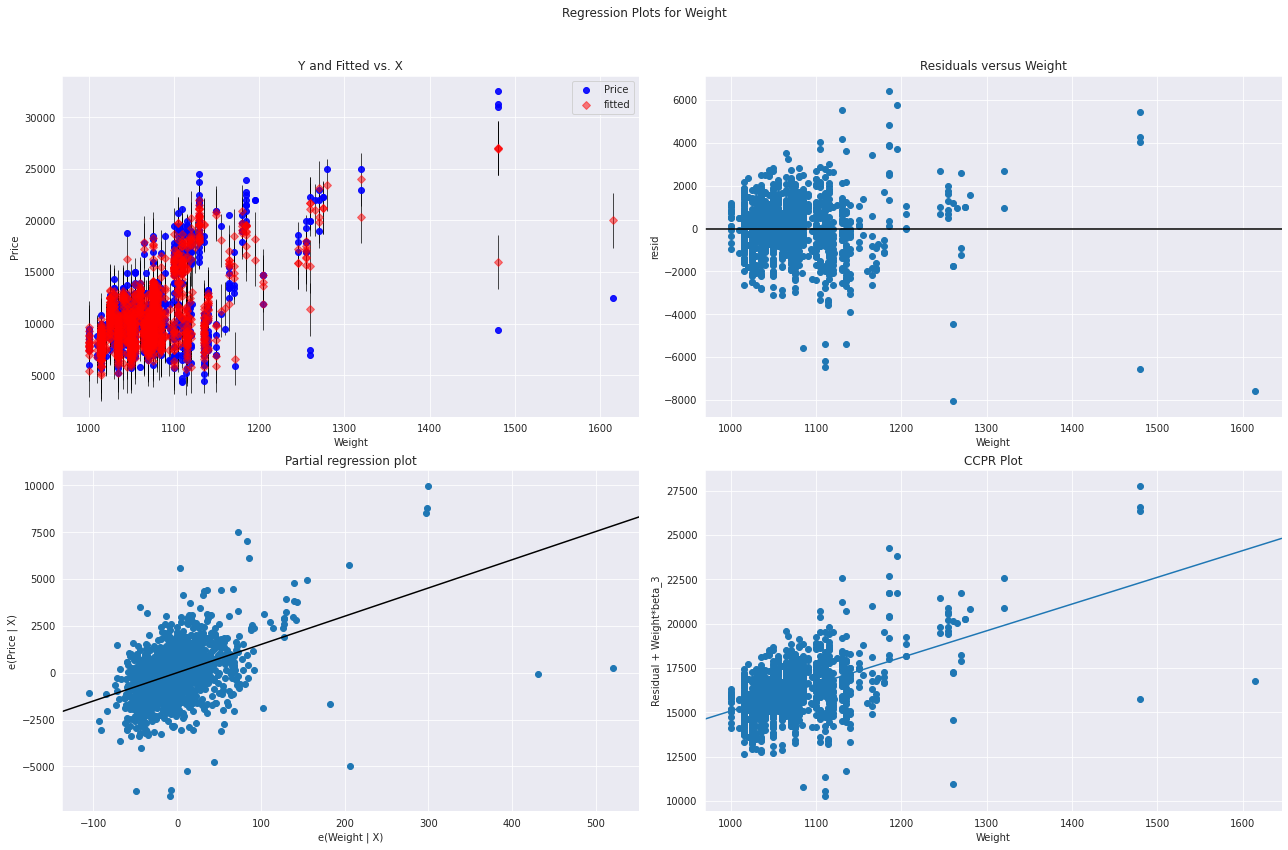

In [55]:
fig = plt.figure(figsize=(18,12))
sa.graphics.plot_regress_exog(model_ols,'Weight',fig=fig);

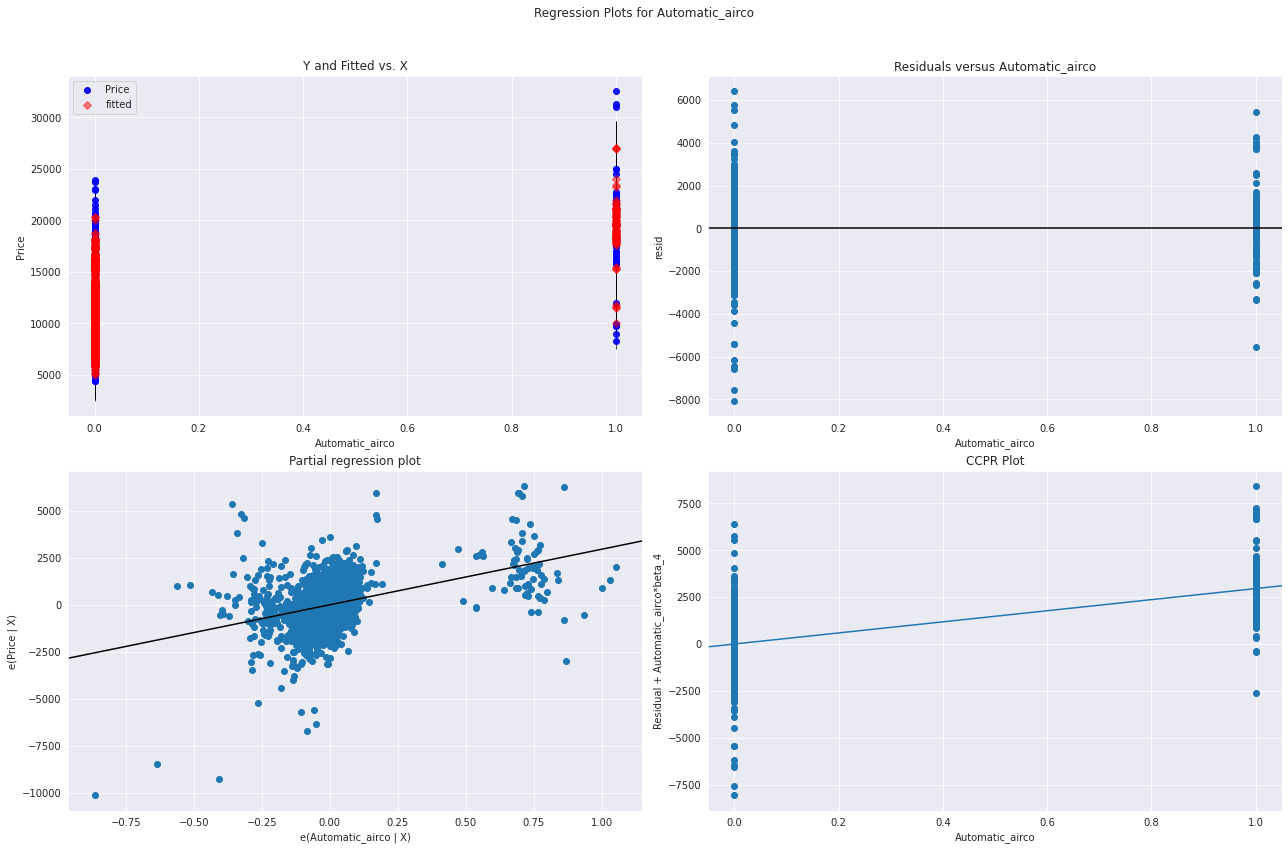

In [56]:
fig = plt.figure(figsize=(18,12))
sa.graphics.plot_regress_exog(model_ols,'Automatic_airco',fig=fig);

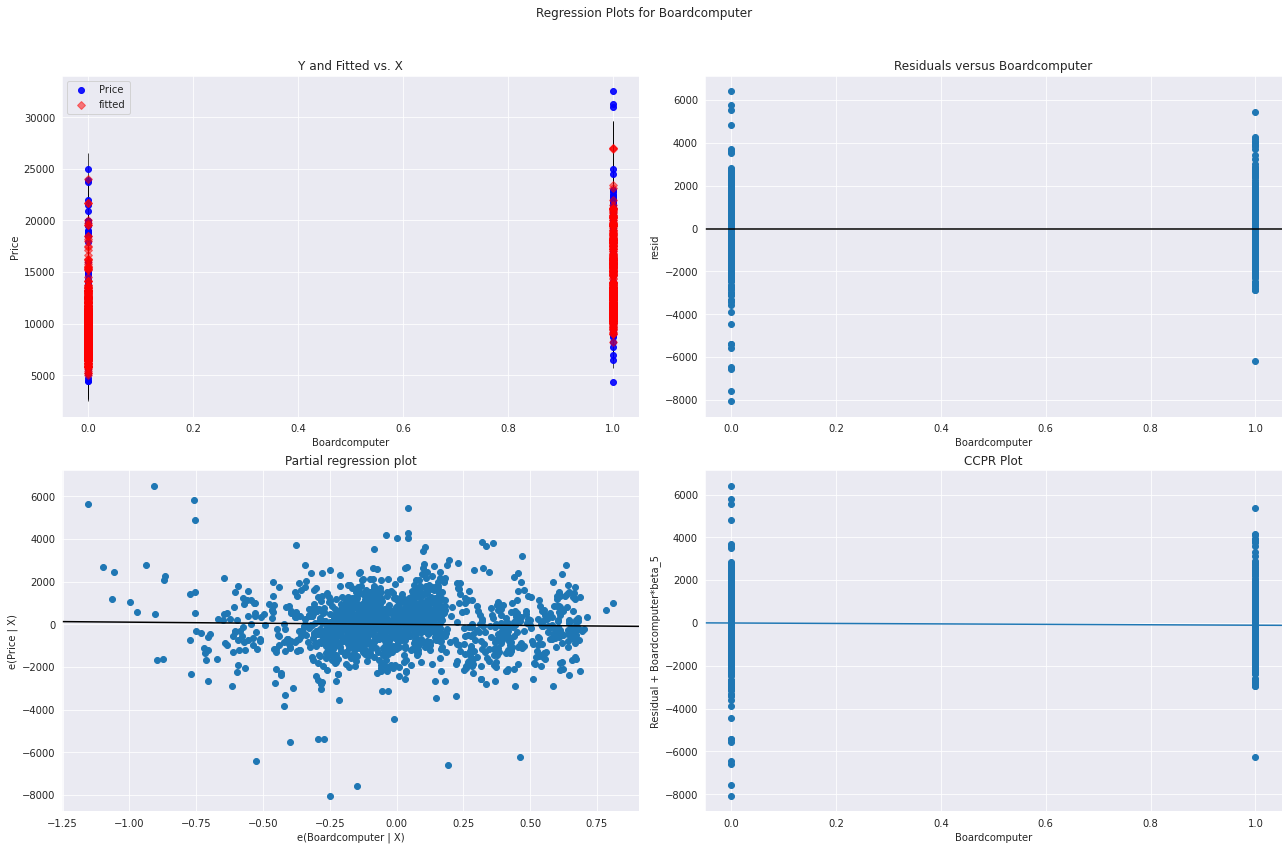

In [57]:
fig = plt.figure(figsize=(18,12))
sa.graphics.plot_regress_exog(model_ols,'Boardcomputer',fig=fig);

Model deletion diagnostics

In [58]:
(c,_) = model_ols.get_influence().cooks_distance

In [59]:
c

array([0.00377696, 0.00193827, 0.0025896 , ..., 0.00014897, 0.00158163,
       0.01323756])

In [60]:
len(data)

1435

In [61]:
x = np.arange(len(data))
y = np.round(c,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks_dis')

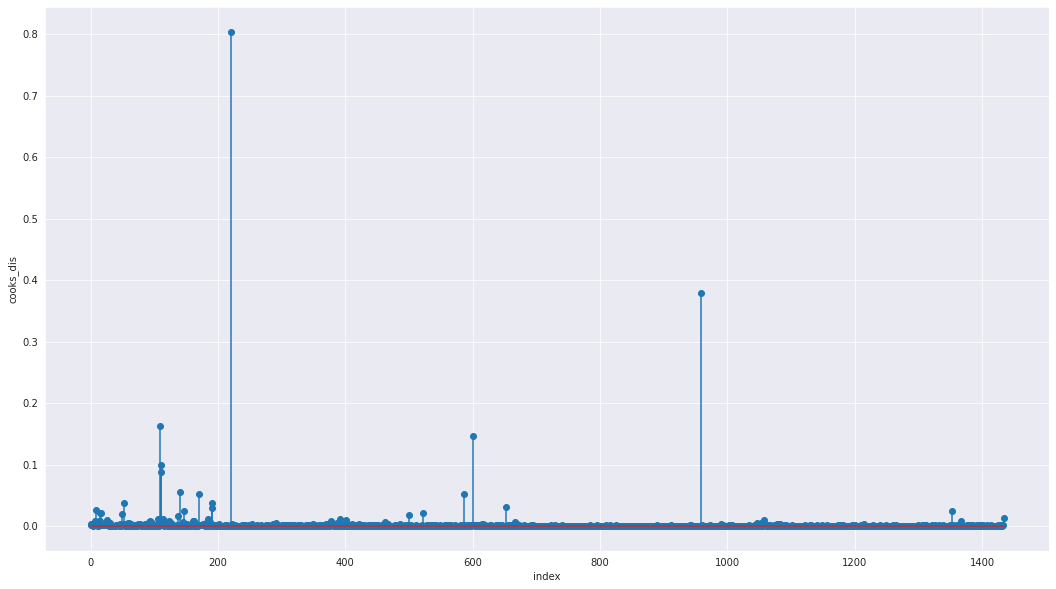

In [62]:
plt.figure(figsize=(18,10))
plt.stem(x,y)
plt.xlabel('index')
plt.ylabel('cooks_dis')

In [63]:
np.argmax(c), np.max(c)

(220, 0.803715170899516)

In [70]:
data.iloc[220:221,0:]

,Price,age,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
220,12450,44,2001,74172,110,1615,0,0


In [71]:
data_imp = data.drop(data.index[220],axis=0)

In [75]:
data_imp.reset_index(drop=True)

,Price,age,Mfg_Year,KM,HP,Weight,Automatic_airco,Boardcomputer
0,13500,23,2002,46986,90,1165,0,1
1,13750,23,2002,72937,90,1165,0,1
2,13950,24,2002,41711,90,1165,0,1
3,14950,26,2002,48000,90,1165,0,1
4,13750,30,2002,38500,90,1170,0,1
...,...,...,...,...,...,...,...,...
1429,7500,69,1998,20544,86,1025,0,0
1430,10845,72,1998,19000,86,1015,0,0
1431,8500,71,1998,17016,86,1015,0,0
1432,7250,70,1998,16916,86,1015,0,0


In [76]:
k = data.shape[1]
n= data.shape[0]
lev = (3*(k+1))/n

In [77]:
lev

0.018815331010452963

Final model

In [80]:
while np.max(c)>0.5:
  model_fin = smf.ols('Price~age+Weight+KM+Automatic_airco+Boardcomputer',data=data_imp).fit()
  (c,_) = model_fin.get_influence().cooks_distance
  c
  np.argmax(c), np.max(c)
  data_imp = data_imp.drop(data_imp.index[np.argmax(c)],axis=0).reset_index(drop=True)
  data_imp
else:
  model_fin = smf.ols('Price~age+Weight+KM+Automatic_airco+Boardcomputer',data=data_imp).fit()
  print('R_squared:%.3f'% model_fin.rsquared, '\n','Adj_Rsquared:%.3f'%model_fin.rsquared_adj)

R_squared:0.884 
 Adj_Rsquared:0.883


In [81]:
print('The improved accuracy is 88.3%')

The improved accuracy is 88.3%
